# Ryan Timbrook
## Data Science 450, Spring 2017
## Date: 05/27/2017
## Assignment 5


# Support Vector Machine
### Question 1
Using what you learnt in the lecture, search for additional resources related to the following two approaches.

* Two-class Support Vector Machine
* Two-class Locally-Deep Support Vector Machine (MSR)

Explain what's the difference between the two algorithms, and provide examples of when you will prefer to use one over the other.

### Question 2
For this exercise, we will use the veh-prime.arff file, and support vector machines for classification.

**Notes**
* As a first step you will need to modify the .arff file so that the car, noncar classes are re-placed with 1 and -1 respectively.
* Consider use 10 fold cross-validation (this should come up as the default)

Try various parameters, and explain what you observe.



In [79]:
# Clear objects from Memory
rm(list=ls())
# Clear Console:
cat("\014")
setwd('C:/workspaces/uw_data_science/ds_450/R/assignment_5')
# Clear objects from Memory
read.data = function(file=file){
  read.csv(file,header = TRUE,stringsAsFactors = FALSE)
}

vehPrime.df <- read.data('veh-prime.csv')

In [80]:
## Install packages
if(!require(e1071)){install.packages("e1071")}
if(!require(Hmisc)){install.packages("Hmisc")}

## Explore the data

In [81]:
names(vehPrime.df)
nrow(vehPrime.df)
str(vehPrime.df)

head(vehPrime.df)
unique(vehPrime.df$CLASS)
describe(vehPrime.df)

vehPrime.inputs = colnames(vehPrime.df[,-37])
vehPrime.target = colnames(vehPrime.df[37])

[1] "f0"    "f1"    "f2"    "f3"    "f4"    "f5"    "f6"    "f7"    "f8"   
[10] "f9"    "f10"   "f11"   "f12"   "f13"   "f14"   "f15"   "f16"   "f17"  
[19] "f18"   "f19"   "f20"   "f21"   "f22"   "f23"   "f24"   "f25"   "f26"  
[28] "f27"   "f28"   "f29"   "f30"   "f31"   "f32"   "f33"   "f34"   "f35"  
[37] "CLASS"

[1] 846

'data.frame':	846 obs. of  37 variables:
 $ f0   : num  0.063 -0.037 0 -0.743 -0.939 -0.247 0 0.663 0.001 -0.048 ...
 $ f1   : num  0.16 -0.325 1.253 -0.082 -1.054 ...
 $ f2   : num  0.509 -0.626 0.833 -0.626 -0.14 ...
 $ f3   : num  -0.967 -0.029 -0.97 0.723 0.036 -0.484 -0.032 -0.321 0.008 0.319 ...
 $ f4   : num  0.058 0.121 1.516 -0.006 -0.766 ...
 $ f5   : num  0 -0.409 0.014 0 0 0.102 -0.162 0.087 -0.517 -0.259 ...
 $ f6   : num  0.874 -0.002 -0.378 -0.08 -0.272 -0.001 -0.49 -0.499 -0.472 0.745 ...
 $ f7   : num  0.271 -0.835 1.197 -0.297 1.077 ...
 $ f8   : num  1.307 -0.595 0.546 0.166 5.236 ...
 $ f9   : num  -0.011 -0.253 -0.402 0.311 -0.366 0.729 -0.02 -0.307 0 0.613 ...
 $ f10  : num  0.311 0.094 0.311 0.094 9.439 ...
 $ f11  : num  -0.063 0.375 0.017 -0.677 -0.5 0.031 0.509 0.299 0.226 0.284 ...
 $ f12  : num  -0.414 -0.005 0.07 0.023 0.061 -0.35 -0.135 0.009 -0.962 0.952 ...
 $ f13  : num  -0.206 -0.597 1.148 -0.747 -0.597 ...
 $ f14  : num  0.136 0.521 -1.144 0.649 0.521

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,CLASS
0.063,0.160,0.509,-0.967,0.058,0.000,0.874,0.271,1.307,-0.011,...,-0.924,-0.077,0.108,-0.003,0.381,-0.314,0.929,0.184,-0.001,noncar
-0.037,-0.325,-0.626,-0.029,0.121,-0.409,-0.002,-0.835,-0.595,-0.253,...,0.270,0.533,0.152,-0.978,0.157,0.011,-0.254,0.453,-0.621,noncar
0.000,1.253,0.833,-0.970,1.516,0.014,-0.378,1.197,0.546,-0.402,...,-0.408,1.550,0.010,-0.652,-0.403,-0.151,0.000,0.049,-0.113,car
-0.743,-0.082,-0.626,0.723,-0.006,0.000,-0.080,-0.297,0.166,0.311,...,0.819,-0.077,-0.099,-0.001,-0.291,1.633,0.686,1.528,0.000,noncar
-0.939,-1.054,-0.140,0.036,-0.766,0.000,-0.272,1.077,5.236,-0.366,...,0.676,0.533,-0.003,0.122,-0.179,-1.449,0.024,-1.698,0.083,noncar
-0.247,1.618,1.967,-0.484,1.516,0.102,-0.001,0.091,-1.482,0.729,...,-0.699,-0.280,0.003,-0.841,-0.403,-1.287,-0.033,-1.698,0.000,noncar


[1] "noncar" "car"

vehPrime.df 

 37  Variables      846  Observations
--------------------------------------------------------------------------------
f0 
      n missing  unique    Info    Mean     .05     .10     .25     .50     .75 
    846       0     536       1 0.01666 -0.6680 -0.4670 -0.1207  0.0000  0.1585 
    .90     .95 
 0.5475  0.7628 

lowest : -0.999 -0.998 -0.995 -0.981 -0.960
highest:  0.975  0.979  0.981  0.993  0.997 
--------------------------------------------------------------------------------
f1 
        n   missing    unique      Info      Mean       .05       .10       .25 
      846         0        44         1 1.537e-05    -1.418    -1.175    -0.811 
      .50       .75       .90       .95 
   -0.082     0.768     1.496     1.739 

lowest : -2.511 -2.147 -2.025 -1.904 -1.783
highest:  2.468  2.589  2.711  2.832  3.075 
--------------------------------------------------------------------------------
f2 
         n    missing     unique       Info       Mean        .05        

## Explore data - Principal Components Analysis

In [82]:
pca = prcomp(na.omit(vehPrime.df[,vehPrime.inputs]), scale=TRUE, center=TRUE, tol=0)
# Show the output of the analysis.
pca
# Summarise the importance of the components found.
summary(pca)

Standard deviations:
 [1] 3.07292997 1.74735498 1.40049539 1.13154005 1.10150977 1.08407240
 [7] 1.07573859 1.06243099 1.06151457 1.05457299 1.02788879 1.01814087
[13] 1.00397787 0.98958815 0.98507178 0.96963894 0.96558870 0.94151218
[19] 0.93254665 0.92158198 0.89459708 0.87795703 0.86782426 0.71147450
[25] 0.58171747 0.46255287 0.39145341 0.30076911 0.24666791 0.20698443
[31] 0.18485714 0.14420437 0.12550596 0.11243569 0.07750339 0.01876379

Rotation:
              PC1           PC2          PC3          PC4          PC5
f0   0.0133616437  0.0550550029 -0.072719236  0.081069281 -0.195349074
f1  -0.2746962009 -0.1286370588  0.116196035  0.043120542  0.039083124
f2  -0.2948781048  0.1285871744  0.032414211  0.129016187 -0.010597038
f3  -0.0004373201  0.0097820530 -0.005005070 -0.229969561 -0.148107518
f4  -0.3040763965 -0.0763410081  0.053191660 -0.042937570  0.001522651
f5   0.0030711388 -0.0251509789  0.068434173  0.207767235  0.260731377
f6  -0.0026477094  0.0475270681 -0.093531010 

Importance of components:
                          PC1     PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.0729 1.74735 1.40050 1.13154 1.1015 1.08407 1.07574
Proportion of Variance 0.2623 0.08481 0.05448 0.03557 0.0337 0.03264 0.03214
Cumulative Proportion  0.2623 0.34712 0.40160 0.43716 0.4709 0.50351 0.53566
                           PC8    PC9    PC10    PC11    PC12   PC13   PC14
Standard deviation     1.06243 1.0615 1.05457 1.02789 1.01814 1.0040 0.9896
Proportion of Variance 0.03135 0.0313 0.03089 0.02935 0.02879 0.0280 0.0272
Cumulative Proportion  0.56701 0.5983 0.62920 0.65855 0.68735 0.7154 0.7426
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     0.98507 0.96964 0.9656 0.94151 0.93255 0.92158 0.89460
Proportion of Variance 0.02695 0.02612 0.0259 0.02462 0.02416 0.02359 0.02223
Cumulative Proportion  0.76950 0.79562 0.8215 0.84614 0.87030 0.89389 0.91612
                          PC22    PC23    PC24   P

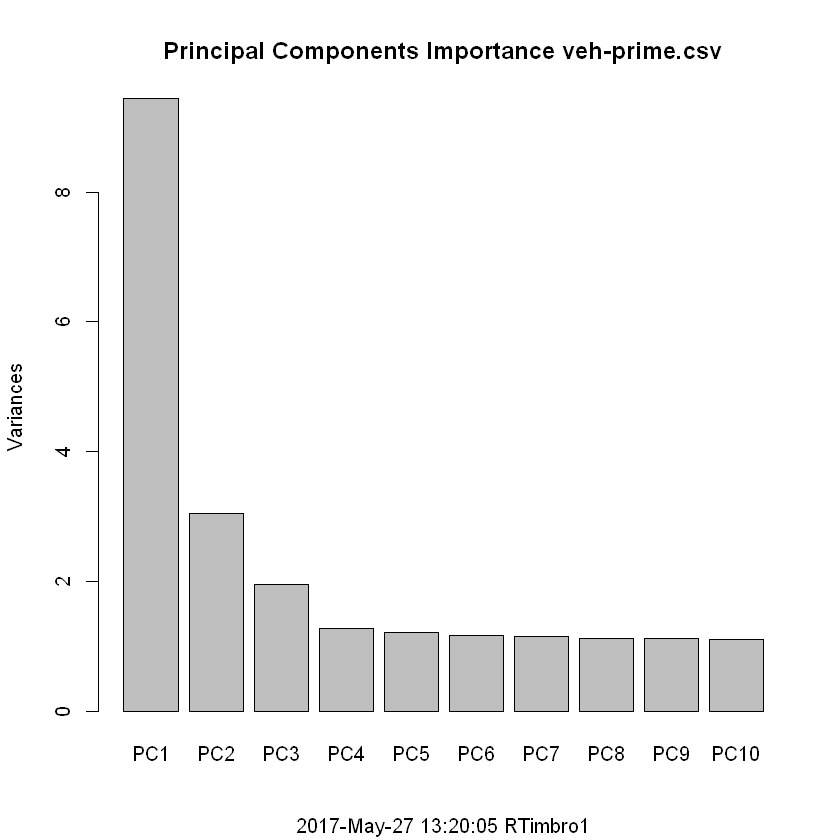

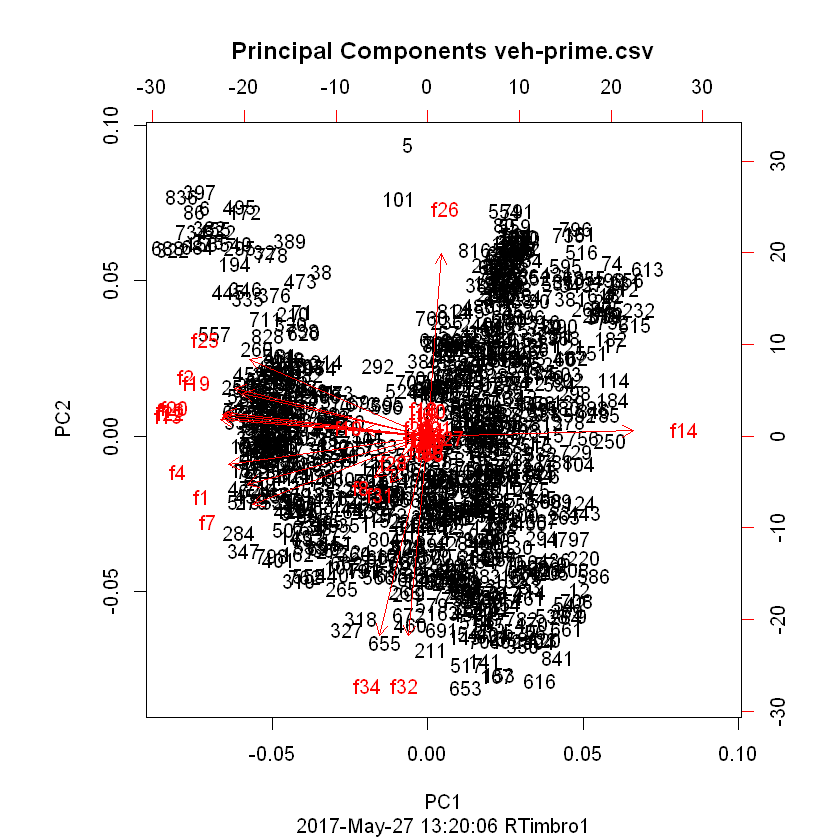

In [83]:
# Display a plot showing the relative importance of the components.
plot(pca, main="")
title(main="Principal Components Importance veh-prime.csv",
    sub=paste(format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))
    axis(1, at=seq(0.7, ncol(pca$rotation)*1.2, 1.2), labels=colnames(pca$rotation), lty=0)

# Display a plot showing the two most principal components.
biplot(pca, main="")
title(main="Principal Components veh-prime.csv",
    sub=paste(format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

### replace car, noncar with binary classification and scale feature values

Credit: https://stackoverflow.com/questions/15215457/standardize-data-columns-in-r

In [84]:
vehPrime.df1 = vehPrime.df
vehPrime.df1$CLASS = as.integer(ifelse(vehPrime.df1$CLASS == 'car',1,0))

# n5 - normalization in range <-1,1> ((x-mean)/max(abs(x-mean)))
if(!require(clusterSim)){install.packages("clusterSim")}
vehPrime.df1 = data.Normalization (vehPrime.df1,type="n5", normalization='column')

str(vehPrime.df1)
describe(vehPrime.df1)

write.csv(vehPrime.df1, file = "veh-prime-trans.csv", row.names=FALSE)

'data.frame':	846 obs. of  37 variables:
 $ f0   : num  0.0456 -0.0528 -0.0164 -0.7479 -0.9409 ...
 $ f1   : num  0.052 -0.1057 0.4075 -0.0267 -0.3428 ...
 $ f2   : num  0.2221 -0.2731 0.3635 -0.2731 -0.0611 ...
 $ f3   : num  -0.9739 -0.0311 -0.9769 0.7246 0.0342 ...
 $ f4   : num  0.02171 0.04531 0.56796 -0.00227 -0.28702 ...
 $ f5   : num  0.0193 -0.3838 0.0331 0.0193 0.0193 ...
 $ f6   : num  0.8754 0.0019 -0.373 -0.0759 -0.2673 ...
 $ f7   : num  0.0553 -0.1704 0.2442 -0.0606 0.2197 ...
 $ f8   : num  0.1351 -0.0615 0.0565 0.0172 0.5413 ...
 $ f9   : num  -0.0163 -0.2582 -0.4072 0.3057 -0.3712 ...
 $ f10  : num  0.03082 0.00932 0.03082 0.00932 0.93539 ...
 $ f11  : num  -0.0676 0.3707 0.0125 -0.6818 -0.5048 ...
 $ f12  : num  -0.409168 0.000172 0.075234 0.028195 0.066226 ...
 $ f13  : num  -0.0712 -0.2064 0.397 -0.2583 -0.2064 ...
 $ f14  : num  0.0529 0.2028 -0.4453 0.2526 0.2028 ...
 $ f15  : num  0.2549 -0.6068 -0.1016 0.0846 0.1123 ...
 $ f16  : num  -0.0693 -0.1881 0.2874 -0.

vehPrime.df1 

 37  Variables      846  Observations
--------------------------------------------------------------------------------
f0 
        n   missing    unique      Info      Mean       .05       .10       .25 
      846         0       536         1 4.014e-18   -0.6741   -0.4762   -0.1353 
      .50       .75       .90       .95 
  -0.0164    0.1397    0.5227    0.7346 

lowest : -1.0000 -0.9990 -0.9961 -0.9823 -0.9616
highest:  0.9436  0.9475  0.9495  0.9613  0.9652 
--------------------------------------------------------------------------------
f1 
        n   missing    unique      Info      Mean       .05       .10       .25 
      846         0        44         1 3.363e-18  -0.46115  -0.38212  -0.26375 
      .50       .75       .90       .95 
 -0.02667   0.24975   0.48650   0.56553 

lowest : -0.8166 -0.6982 -0.6585 -0.6192 -0.5798
highest:  0.8026  0.8420  0.8816  0.9210  1.0000 
--------------------------------------------------------------------------------
f2 
    

In [85]:
pca1 = prcomp(na.omit(vehPrime.df1[,vehPrime.inputs]), scale=TRUE, center=TRUE, tol=0)
# Show the output of the analysis.
pca1
# Summarise the importance of the components found.
summary(pca1)

Standard deviations:
 [1] 3.07292997 1.74735498 1.40049539 1.13154005 1.10150977 1.08407240
 [7] 1.07573859 1.06243099 1.06151457 1.05457299 1.02788879 1.01814087
[13] 1.00397787 0.98958815 0.98507178 0.96963894 0.96558870 0.94151218
[19] 0.93254665 0.92158198 0.89459708 0.87795703 0.86782426 0.71147450
[25] 0.58171747 0.46255287 0.39145341 0.30076911 0.24666791 0.20698443
[31] 0.18485714 0.14420437 0.12550596 0.11243569 0.07750339 0.01876379

Rotation:
              PC1           PC2          PC3          PC4          PC5
f0   0.0133616437  0.0550550029 -0.072719236  0.081069281 -0.195349074
f1  -0.2746962009 -0.1286370588  0.116196035  0.043120542  0.039083124
f2  -0.2948781048  0.1285871744  0.032414211  0.129016187 -0.010597038
f3  -0.0004373201  0.0097820530 -0.005005070 -0.229969561 -0.148107518
f4  -0.3040763965 -0.0763410081  0.053191660 -0.042937570  0.001522651
f5   0.0030711388 -0.0251509789  0.068434173  0.207767235  0.260731377
f6  -0.0026477094  0.0475270681 -0.093531010 

Importance of components:
                          PC1     PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.0729 1.74735 1.40050 1.13154 1.1015 1.08407 1.07574
Proportion of Variance 0.2623 0.08481 0.05448 0.03557 0.0337 0.03264 0.03214
Cumulative Proportion  0.2623 0.34712 0.40160 0.43716 0.4709 0.50351 0.53566
                           PC8    PC9    PC10    PC11    PC12   PC13   PC14
Standard deviation     1.06243 1.0615 1.05457 1.02789 1.01814 1.0040 0.9896
Proportion of Variance 0.03135 0.0313 0.03089 0.02935 0.02879 0.0280 0.0272
Cumulative Proportion  0.56701 0.5983 0.62920 0.65855 0.68735 0.7154 0.7426
                          PC15    PC16   PC17    PC18    PC19    PC20    PC21
Standard deviation     0.98507 0.96964 0.9656 0.94151 0.93255 0.92158 0.89460
Proportion of Variance 0.02695 0.02612 0.0259 0.02462 0.02416 0.02359 0.02223
Cumulative Proportion  0.76950 0.79562 0.8215 0.84614 0.87030 0.89389 0.91612
                          PC22    PC23    PC24   P

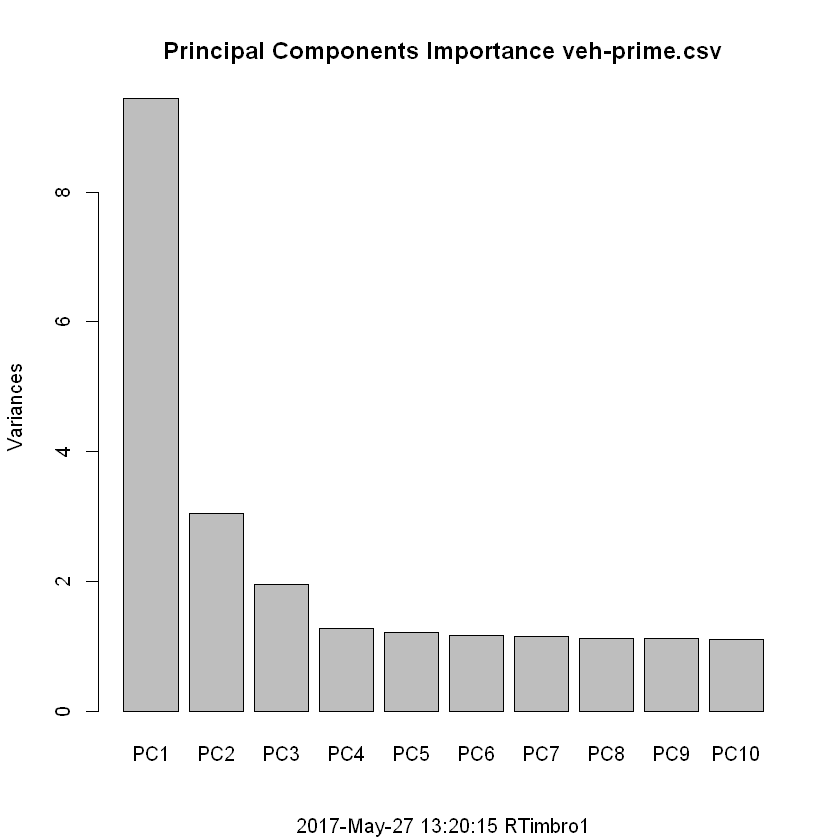

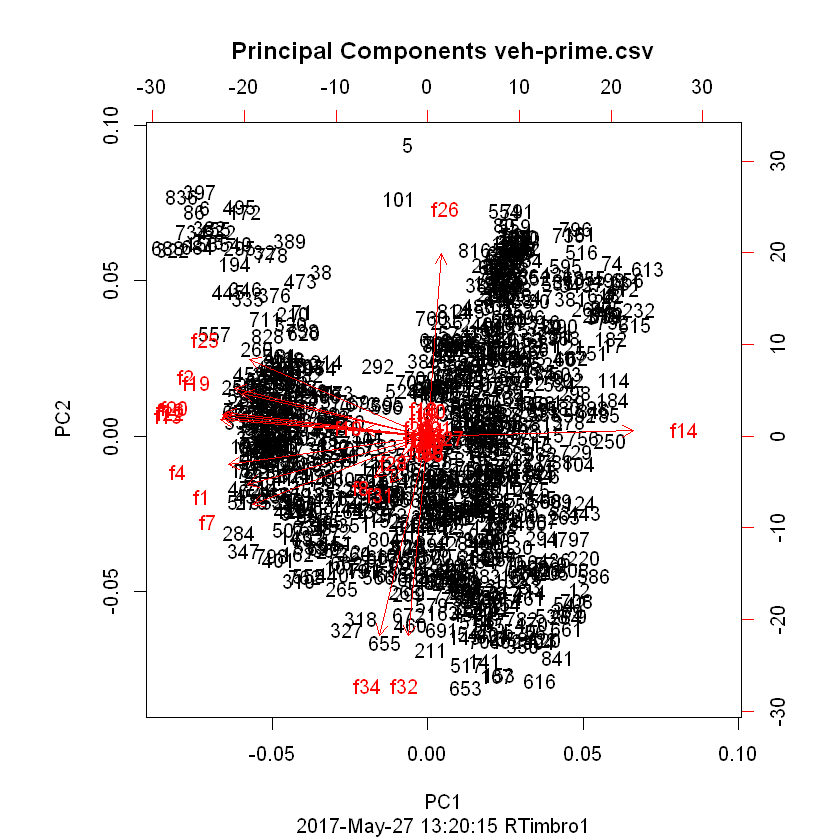

In [86]:
# Display a plot showing the relative importance of the components.
plot(pca1, main="")
title(main="Principal Components Importance veh-prime.csv",
    sub=paste(format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))
    axis(1, at=seq(0.7, ncol(pca1$rotation)*1.2, 1.2), labels=colnames(pca1$rotation), lty=0)

# Display a plot showing the two most principal components.
biplot(pca1, main="")
title(main="Principal Components veh-prime.csv",
    sub=paste(format(Sys.time(), "%Y-%b-%d %H:%M:%S"), Sys.info()["user"]))

In [87]:
# Create training / validation / test data
set.seed(3456)

nobs <- nrow(vehPrime.df1) # 846 observations 
sample <- train <- sample(nrow(vehPrime.df1), 0.7*nobs) # 592 observations
validate <- sample(setdiff(seq_len(nrow(vehPrime.df1)), train), 0.15*nobs) # 126 observations
test <- setdiff(setdiff(seq_len(nrow(vehPrime.df1)), train), validate) # 128 observations

# Model using SVM
### Kernel RBF


In [88]:
if(!require(kernlab)){install.packages("kernlab")}
trainData = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
rbfSVM = ksvm(as.factor(CLASS) ~., data=trainData, 
              kernel="anovadot", prob.model=TRUE)
rbfSVM

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 151 

Objective Function Value : -106.5757 
Training error : 0.052365 
Probability model included. 

# Update Model to include best paramater cost of 100

In [95]:

if(!require(kernlab)){install.packages("kernlab")}
trainData = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
rbfSVM = ksvm(as.factor(CLASS) ~., data=trainData, 
              kernel="anovadot", type="C-svc", C=100,scaled=c(), prob.model=TRUE)
rbfSVM

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Anova RBF kernel function. 
 Hyperparameter : sigma =  1 degree =  1 

Number of Support Vectors : 94 

Objective Function Value : -526.8322 
Training error : 0 
Probability model included. 

# Evaluate the SVM Model Performance

In [96]:
rbfSVM.perf = kernlab::predict(rbfSVM, newdata=vehPrime.df1[test,c(vehPrime.inputs,vehPrime.target)])

table(na.omit(vehPrime.df1[test, c(vehPrime.inputs,vehPrime.target)])$CLASS, rbfSVM.perf,
        useNA="ifany",
        dnn=c("Actual", "Predicted"))
# Generate the confusion matrix showing proportions.
pCme <- function(actual, cl)
{
  x <- table(actual, cl)
  nc <- nrow(x) # Number of classes.
  nv <- length(actual) - sum(is.na(actual) | is.na(cl)) # Number of values.
  tbl <- cbind(x/nv,
               Error=sapply(1:nc,
                 function(r) round(sum(x[r,-r])/sum(x[r,]), 2)))
  names(attr(tbl, "dimnames")) <- c("Actual", "Predicted")
  return(tbl)
}
proportions = pCme(na.omit(vehPrime.df1[test, c(vehPrime.inputs,vehPrime.target)])$CLASS, rbfSVM.perf)
round(proportions,2)


                   Predicted
Actual              -1 0.972027972027972
  -1                56                 4
  0.972027972027972  2                66

,-1,0.972027972027972,Error
-1,0.44,0.03,0.07
0.972027972027972,0.02,0.52,0.03


# Credit: rattle package

Loading required package: gplot2
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'gplot2'"Installing package into 'C:/Users/rtimbro1/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'gplot2' is not available (for R version 3.3.2)"

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.9806373


Slot "alpha.values":
list()


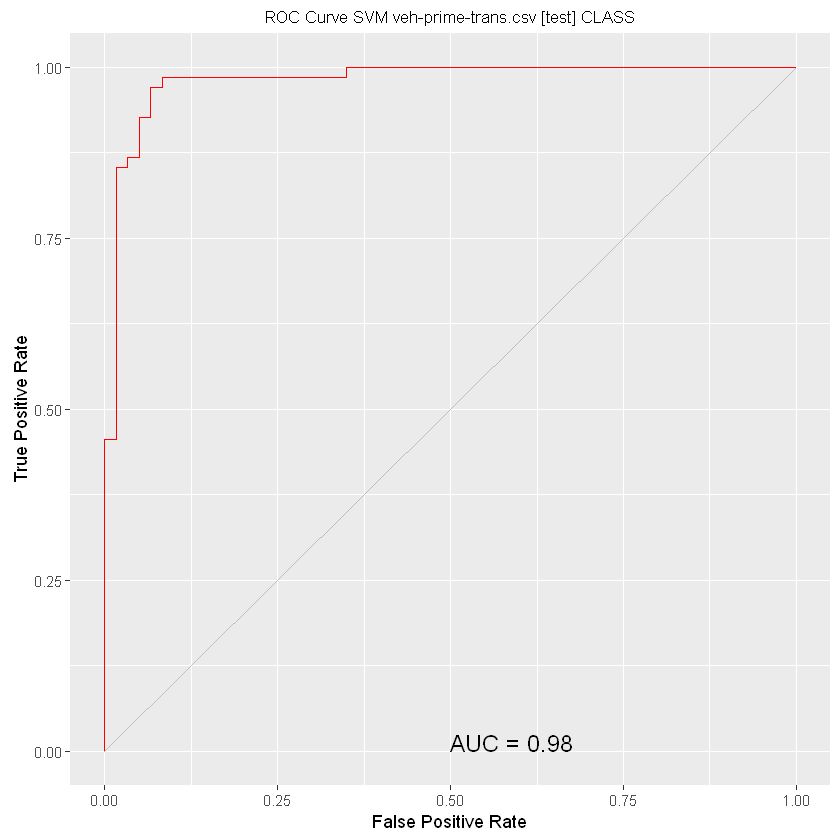

In [97]:
if(!require(ROCR)){install.packages("ROCR")}
if(!require(gplot2)){install.packages("gplot2")}
testData = vehPrime.df1[test,c(vehPrime.inputs,vehPrime.target)]
rOp = kernlab::predict(rbfSVM, newdata=testData, type="probabilities")[,2]

no.miss = na.omit(na.omit(testData)$CLASS)
miss.list = attr(no.miss, "na.action")
attributes(no.miss) = NULL

if (length(miss.list))
{
  pred = prediction(rOp[-miss.list], no.miss)
} else
{
  pred = prediction(rOp, no.miss)
}

pe = performance(pred, "tpr", "fpr")
au = performance(pred, "auc")@y.values[[1]]
pd = data.frame(fpr=unlist(pe@x.values), tpr=unlist(pe@y.values))
p = ggplot(pd, aes(x=fpr, y=tpr))
p = p + geom_line(colour="red")
p = p + xlab("False Positive Rate") + ylab("True Positive Rate")
p = p + ggtitle("ROC Curve SVM veh-prime-trans.csv [test] CLASS")
p = p + theme(plot.title=element_text(size=10))
p = p + geom_line(data=data.frame(), aes(x=c(0,1), y=c(0,1)), colour="grey")
p = p + annotate("text", x=0.50, y=0.00, hjust=0, vjust=0, size=5,
                   label=paste("AUC =", round(au, 2)))
print(p)

# Calculate the area under the curve for the plot.
# Remove observations with missing target.
no.miss   <- na.omit(na.omit(testData)$CLASS)
miss.list <- attr(no.miss, "na.action")
attributes(no.miss) <- NULL
if (length(miss.list))
{
  pred <- prediction(rOp[-miss.list], no.miss)
} else
{
  pred <- prediction(rOp, no.miss)
}
performance(pred, "auc")


In [61]:
if(!require(caret)){install.packages("caret")}
if(!require(mlbench)){install.packages("mlbench")}

corMatrix = cor(vehPrime.df1[,1:36])
hCor = findCorrelation(corMatrix,cutoff=0.5)
colnames(vehPrime.df1[hCor])
vehPrime.hCor.inputs = colnames(vehPrime.df1[hCor])

[1] "f4"  "f14" "f20" "f13" "f16" "f22" "f7"  "f1"  "f2"  "f25" "f34" "f10"
[13] "f26"

In [62]:
if(!require(kernlab)){install.packages("kernlab")}
dat = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
rbfSVM = ksvm(as.factor(CLASS) ~f4+f14+f20+f13+f16+f22+f7+f1+f2+f25+f34+f10+f26, data=dat, 
              kernel="anovadot", cost=10, prob.model=TRUE)
rbfSVM
summary(rbfSVM)


 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Anova RBF kernel function. 
 Hyperparameter : sigma =  1 degree =  1 

Number of Support Vectors : 199 

Objective Function Value : -134.7612 
Training error : 0.057432 
Probability model included. 

Length  Class   Mode 
     1   ksvm     S4 

In [63]:
if(!require(kernlab)){install.packages("kernlab")}
dat = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
rbfSVM = ksvm(as.factor(CLASS) ~f4+f14+f20+f13+f16+f22+f7+f1+f2+f25+f34+f10+f26, data=dat, 
              kernel="anovadot", cost=.1, prob.model=TRUE)
rbfSVM
summary(rbfSVM)

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Anova RBF kernel function. 
 Hyperparameter : sigma =  1 degree =  1 

Number of Support Vectors : 199 

Objective Function Value : -134.7612 
Training error : 0.057432 
Probability model included. 

Length  Class   Mode 
     1   ksvm     S4 

In [64]:
rbfSVM.perf = kernlab::predict(rbfSVM, newdata=vehPrime.df1[test,c(vehPrime.inputs,vehPrime.target)])

table(na.omit(vehPrime.df1[test, c(vehPrime.inputs,vehPrime.target)])$CLASS, rbfSVM.perf,
        useNA="ifany",
        dnn=c("Actual", "Predicted"))
# Generate the confusion matrix showing proportions.
pCme <- function(actual, cl)
{
  x <- table(actual, cl)
  nc <- nrow(x) # Number of classes.
  nv <- length(actual) - sum(is.na(actual) | is.na(cl)) # Number of values.
  tbl <- cbind(x/nv,
               Error=sapply(1:nc,
                 function(r) round(sum(x[r,-r])/sum(x[r,]), 2)))
  names(attr(tbl, "dimnames")) <- c("Actual", "Predicted")
  return(tbl)
}
proportions = pCme(na.omit(vehPrime.df1[test, c(vehPrime.inputs,vehPrime.target)])$CLASS, rbfSVM.perf)
round(proportions,2)

                   Predicted
Actual              -1 0.972027972027972
  -1                56                 4
  0.972027972027972  7                61

,-1,0.972027972027972,Error
-1,0.44,0.03,0.07
0.972027972027972,0.05,0.48,0.10


Loading required package: gplot2
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'gplot2'"Installing package into 'C:/Users/rtimbro1/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'gplot2' is not available (for R version 3.3.2)"

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.9710784


Slot "alpha.values":
list()


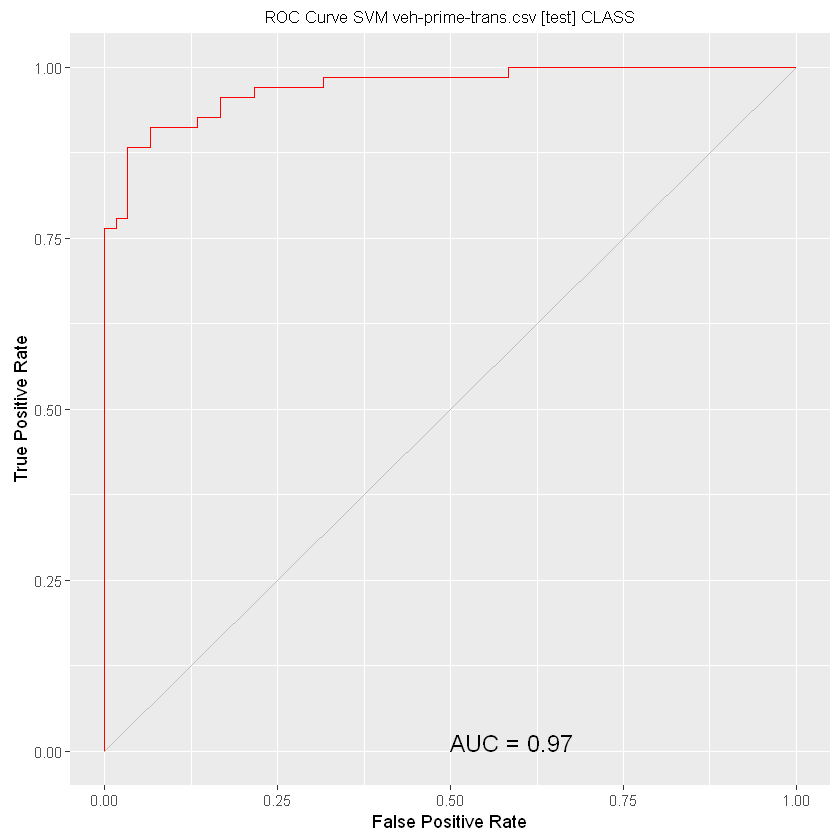

In [65]:
if(!require(ROCR)){install.packages("ROCR")}
if(!require(gplot2)){install.packages("gplot2")}
testData = vehPrime.df1[test,c(vehPrime.inputs,vehPrime.target)]
rOp = kernlab::predict(rbfSVM, newdata=testData, type="probabilities")[,2]

no.miss = na.omit(na.omit(testData)$CLASS)
miss.list = attr(no.miss, "na.action")
attributes(no.miss) = NULL

if (length(miss.list))
{
  pred = prediction(rOp[-miss.list], no.miss)
} else
{
  pred = prediction(rOp, no.miss)
}

pe = performance(pred, "tpr", "fpr")
au = performance(pred, "auc")@y.values[[1]]
pd = data.frame(fpr=unlist(pe@x.values), tpr=unlist(pe@y.values))
p = ggplot(pd, aes(x=fpr, y=tpr))
p = p + geom_line(colour="red")
p = p + xlab("False Positive Rate") + ylab("True Positive Rate")
p = p + ggtitle("ROC Curve SVM veh-prime-trans.csv [test] CLASS")
p = p + theme(plot.title=element_text(size=10))
p = p + geom_line(data=data.frame(), aes(x=c(0,1), y=c(0,1)), colour="grey")
p = p + annotate("text", x=0.50, y=0.00, hjust=0, vjust=0, size=5,
                   label=paste("AUC =", round(au, 2)))
print(p)

# Calculate the area under the curve for the plot.
# Remove observations with missing target.
no.miss   <- na.omit(na.omit(testData)$CLASS)
miss.list <- attr(no.miss, "na.action")
attributes(no.miss) <- NULL
if (length(miss.list))
{
  pred <- prediction(rOp[-miss.list], no.miss)
} else
{
  pred <- prediction(rOp, no.miss)
}
performance(pred, "auc")

In [45]:
if(!require(e1071)){install.packages("e1071")}
dat = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
svmMod = svm(as.factor(CLASS) ~., data=dat, 
              kernel="linear", cost=10, scale=FALSE)
svmMod$index
summary(svmMod)

[1]   2   9  13  19  23  34  50  52  53  56  57  60  68  69  74  76  86  89
 [19]  90  99 107 111 118 124 130 132 138 149 153 155 164 171 174 179 183 187
 [37] 206 207 217 219 220 224 257 272 275 285 292 293 294 295 314 318 324 332
 [55] 334 342 343 345 346 348 356 360 363 373 375 376 377 387 388 389 398 405
 [73] 411 412 415 418 423 424 427 428 429 437 438 455 460 483 485 489 505 509
 [91] 512 517 528 530 542 543 562 590 592  11  14  26  33  35  40  48  51  54
[109]  59  61  62  72  79  83  85  87  88  94 103 115 120 128 137 145 150 162
[127] 175 178 186 191 193 194 210 214 233 239 241 248 249 252 259 261 263 281
[145] 286 298 305 309 316 319 323 327 333 337 362 370 371 383 384 386 396 400
[163] 403 404 409 422 430 431 439 442 447 449 467 469 475 479 481 484 486 497
[181] 499 504 508 518 523 526 545 547 558 560 561 565 568 570 574 583 587


Call:
svm(formula = as.factor(CLASS) ~ ., data = dat, kernel = "linear", 
    cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.02777778 

Number of Support Vectors:  197

 ( 99 98 )


Number of Classes:  2 

Levels: 
 -1 0.972027972027972




ERROR: Error in plot.svm(svmMod, dat): missing formula.


# Decrease the cost and evaluate how that effects the number of support vectors

lower cost from 10 to .1 increased the support vector count from 197 to 412

In [46]:
if(!require(e1071)){install.packages("e1071")}
dat = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]
svmMod = svm(as.factor(CLASS) ~., data=dat, 
              kernel="linear", cost=.1, scale=FALSE)
svmMod$index
summary(svmMod)

[1]   1   2   9  13  19  23  25  28  34  38  45  50  52  53  56  57  60  68
 [19]  69  70  71  73  74  76  80  81  84  86  89  90  99 101 102 110 111 112
 [37] 116 118 123 124 126 127 129 130 132 135 138 139 142 149 153 155 156 158
 [55] 159 164 166 168 169 171 174 176 179 180 181 183 184 185 187 188 192 196
 [73] 197 198 203 204 206 207 217 219 220 222 223 224 230 234 237 238 245 246
 [91] 257 266 268 272 275 278 283 284 285 288 289 292 293 294 295 299 304 312
[109] 313 314 315 317 318 324 325 329 332 334 335 340 342 343 344 345 346 347
[127] 348 349 354 356 360 361 365 367 369 372 373 375 376 377 381 385 387 388
[145] 389 390 392 397 398 399 405 412 415 417 418 420 421 423 424 427 428 429
[163] 432 434 435 437 438 443 451 455 458 460 463 464 468 477 478 482 483 485
[181] 488 489 494 502 505 506 507 510 512 513 514 516 517 524 528 530 531 534
[199] 536 539 542 543 562 571 578 580 588 590 592   6   8  10  11  14  20  21
[217]  26  33  35  37  40  42  43  46  47  48  51  54  55  58  59  61  64  67
[235]  72  75  78  79  83  85  87  88  94 103 104 105 106 108 114 115 117 120
[253] 121 128 131 133 134 137 143 145 147 148 150 161 162 170 173 175 177 178
[271] 182 186 190 191 193 194 200 202 208 209 210 211 213 214 218 225 231 232
[289] 233 239 241 242 243 244 248 249 252 253 256 259 261 262 263 264 279 280
[307] 281 282 286 298 301 302 305 309 310 316 319 320 321 322 331 333 337 338
[325] 339 341 350 352 353 362 366 370 371 380 383 393 396 400 403 404 407 409
[343] 410 414 422 425 426 430 431 439 441 442 444 446 447 452 456 466 467 469
[361] 471 475 476 479 480 481 484 486 487 490 492 493 495 497 498 499 501 504
[379] 508 518 519 523 525 526 527 532 537 541 545 547 549 551 552 554 556 557
[397] 558 560 561 563 565 567 568 569 570 572 574 575 583 584 585 587


Call:
svm(formula = as.factor(CLASS) ~ ., data = dat, kernel = "linear", 
    cost = 0.1, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.02777778 

Number of Support Vectors:  412

 ( 209 203 )


Number of Classes:  2 

Levels: 
 -1 0.972027972027972




# Tune the Parameters

In [47]:
set.seed(4568)
svmMod.tuned = tune(svm, as.factor(CLASS)~., data=dat, kernel='linear', range=list(cost=c(0.001,0.01, 0.1, 1, 5, 10, 100)))
summary(svmMod.tuned)
svmMod.best = svmMod.tuned$best.model
summary(svmMod.best)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.07435028 

- Detailed performance results:
   cost      error dispersion
1 1e-03 0.26522599 0.04462809
2 1e-02 0.18757062 0.05689502
3 1e-01 0.09299435 0.02704032
4 1e+00 0.07437853 0.02564182
5 5e+00 0.07604520 0.02804471
6 1e+01 0.08279661 0.02189036
7 1e+02 0.07435028 0.01831918



Call:
best.tune(method = svm, train.x = as.factor(CLASS) ~ ., data = dat, 
    ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  100 
      gamma:  0.02777778 

Number of Support Vectors:  77

 ( 39 38 )


Number of Classes:  2 

Levels: 
 -1 0.972027972027972




# Train SVM with different kernels - linear, rbf, polynomial
## What are the number of support vectors for each

* Linear -> 177
* RBF -> 312
* Polynomial -> 117


In [76]:
if(!require(kernlab)){install.packages("kernlab")}
trainData = vehPrime.df1[train,c(vehPrime.inputs,vehPrime.target)]

# LINEAR SVM
linSVM = ksvm(as.factor(CLASS) ~., data=trainData, kernel="vanilladot", type="C-svc", C=100,scaled=c())
linSVM
#alpha(linSVM)


 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Linear (vanilla) kernel function. 

Number of Support Vectors : 117 

Objective Function Value : -8291.746 
Training error : 0.045608 

In [77]:
# RBF SVM
rbfSVM = ksvm(as.factor(CLASS) ~., data=trainData, kernel="rbfdot", type="C-svc", C=100,scaled=c())
rbfSVM
#alpha(rbfSVM)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.146078235146354 

Number of Support Vectors : 325 

Objective Function Value : -667.2865 
Training error : 0 

In [78]:
# POLYNOMIAL SVM
polSVM = ksvm(as.factor(CLASS) ~., data=trainData, kernel="polydot", type="C-svc", C=100,scaled=c())
polSVM
#alpha(polSVM)

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 100 

Polynomial kernel function. 
 Hyperparameters : degree =  1  scale =  1  offset =  1 

Number of Support Vectors : 117 

Objective Function Value : -8291.768 
Training error : 0.045608 